In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/index-kualitas-udara-sumut/IKU_Sumut__clean_.csv


# Load data

In [2]:
index_udara = pd.read_csv('/kaggle/input/index-kualitas-udara-sumut/IKU_Sumut__clean_.csv')

In [3]:
index_udara.head()

,wilayah,year,target,capaian
0,Gunung Sitoli,2022,93.74,95.89
1,Kabupaten Asahan,2022,87.33,89.40
2,Kabupaten Batu Bara,2022,80.22,83.19
3,Kabupaten Dairi,2022,85.69,91.74
4,Kabupaten Deli Serdang,2022,76.14,69.68


In [4]:
index_udara

,wilayah,year,target,capaian
0,Gunung Sitoli,2022,93.74,95.89
1,Kabupaten Asahan,2022,87.33,89.40
2,Kabupaten Batu Bara,2022,80.22,83.19
3,Kabupaten Dairi,2022,85.69,91.74
4,Kabupaten Deli Serdang,2022,76.14,69.68
...,...,...,...,...
73,Kabupaten Humbang Hasundutan,2022,83.43,85.66
74,Kabupaten Samosir,2022,89.50,91.13
75,Kabupaten Serdang Bedagai,2022,87.50,83.00
76,Kabupaten Batu Bara,2022,80.22,83.19


In [5]:
index_udara.describe

<bound method NDFrame.describe of                          wilayah  year  target  capaian
0                  Gunung Sitoli  2022   93.74    95.89
1               Kabupaten Asahan  2022   87.33    89.40
2            Kabupaten Batu Bara  2022   80.22    83.19
3                Kabupaten Dairi  2022   85.69    91.74
4         Kabupaten Deli Serdang  2022   76.14    69.68
..                           ...   ...     ...      ...
73  Kabupaten Humbang Hasundutan  2022   83.43    85.66
74             Kabupaten Samosir  2022   89.50    91.13
75     Kabupaten Serdang Bedagai  2022   87.50    83.00
76           Kabupaten Batu Bara  2022   80.22    83.19
77  Kabupaten Padang Lawas Utara  2022   93.91    95.57

[78 rows x 4 columns]>

In [6]:
# Informasi tipe data & jumlah non-null
index_udara.info()

# Dimensi dataset
print("Jumlah baris & kolom:", index_udara.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wilayah  78 non-null     object 
 1   year     78 non-null     int64  
 2   target   78 non-null     float64
 3   capaian  78 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ KB
Jumlah baris & kolom: (78, 4)


In [7]:
index_udara.describe()

,year,target,capaian
count,78.0,78.000000,78.000000
mean,2022.0,87.919744,90.136923
std,0.0,5.691532,6.569137
min,2022.0,74.470000,69.680000
25%,2022.0,84.300000,85.660000
50%,2022.0,88.325000,91.220000
75%,2022.0,93.642500,95.495000
max,2022.0,95.260000,99.330000


# Data Cleaning

In [8]:
# Cek Missing Values
index_udara.isnull().sum()


wilayah    0
year       0
target     0
capaian    0
dtype: int64

In [9]:
# Cek Duplicate Data
index_udara.duplicated().sum()


44

In [10]:
# Hapus Duplikasi
index_udara = index_udara.drop_duplicates()


In [11]:
# Cek Duplicate Data
index_udara.duplicated().sum()

0

In [12]:
index_udara.head()

,wilayah,year,target,capaian
0,Gunung Sitoli,2022,93.74,95.89
1,Kabupaten Asahan,2022,87.33,89.40
2,Kabupaten Batu Bara,2022,80.22,83.19
3,Kabupaten Dairi,2022,85.69,91.74
4,Kabupaten Deli Serdang,2022,76.14,69.68


In [13]:
# Standardisasi Nama Kolom
index_udara = index_udara.rename(columns={
    "wilayah": "wilayah",
    "year": "year",
    "target": "target",
    "capaian": "capaian",
})

In [14]:
# Validasi Range Nilai 

for col in ["target", "capaian"]:
    outliers = index_udara[~index_udara[col].between(0, 100)]
    if not outliers.empty:
        print("Ada nilai di luar range:", outliers)


In [15]:
index_udara.info()

# Dimensi dataset
print("Jumlah baris & kolom:", index_udara.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 53
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wilayah  34 non-null     object 
 1   year     34 non-null     int64  
 2   target   34 non-null     float64
 3   capaian  34 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB
Jumlah baris & kolom: (34, 4)


In [16]:
index_udara.tail()

,wilayah,year,target,capaian
48,Kota Tanjungbalai,2022,87.54,91.38
49,Kota Binjai,2022,84.00,85.50
50,Kota Tebing Tinggi,2022,75.56,81.51
51,Kota Padangsidimpuan,2022,84.05,86.91
53,Provinsi Sumatera Utara,2022,87.19,89.69


# Exploratory Data Analysis (EDA)

# Melihat Distribusi Pasar

         year     target    capaian
count    34.0  34.000000  34.000000
mean   2022.0  87.542941  89.690588
std       0.0   5.705420   6.684726
min    2022.0  74.470000  69.680000
25%    2022.0  84.300000  85.540000
50%    2022.0  87.920000  91.105000
75%    2022.0  92.420000  94.917500
max    2022.0  95.260000  99.330000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


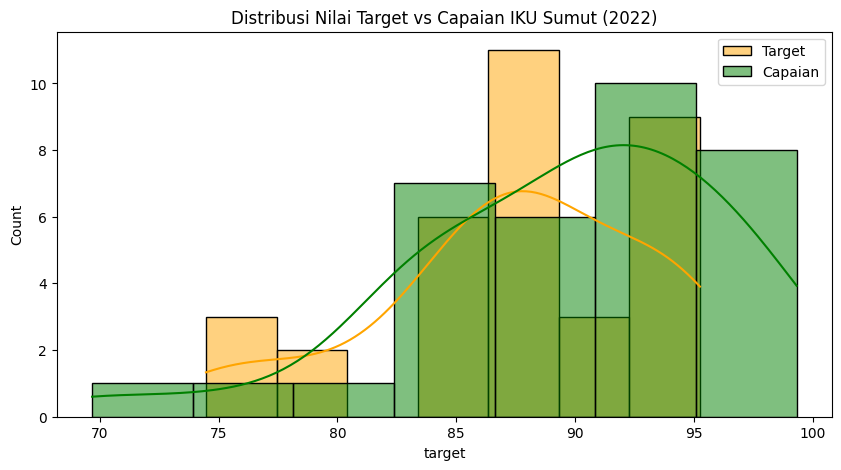

In [17]:
# Ringkasan statistik
print(index_udara.describe())

# Distribusi Target & Capaian
plt.figure(figsize=(10,5))
sns.histplot(index_udara["target"], color="orange", label="Target", kde=True)
sns.histplot(index_udara["capaian"], color="green", label="Capaian", kde=True)
plt.legend()
plt.title("Distribusi Nilai Target vs Capaian IKU Sumut (2022)")
plt.show()

# Perbandingan Target vs Capaian per Wilayah

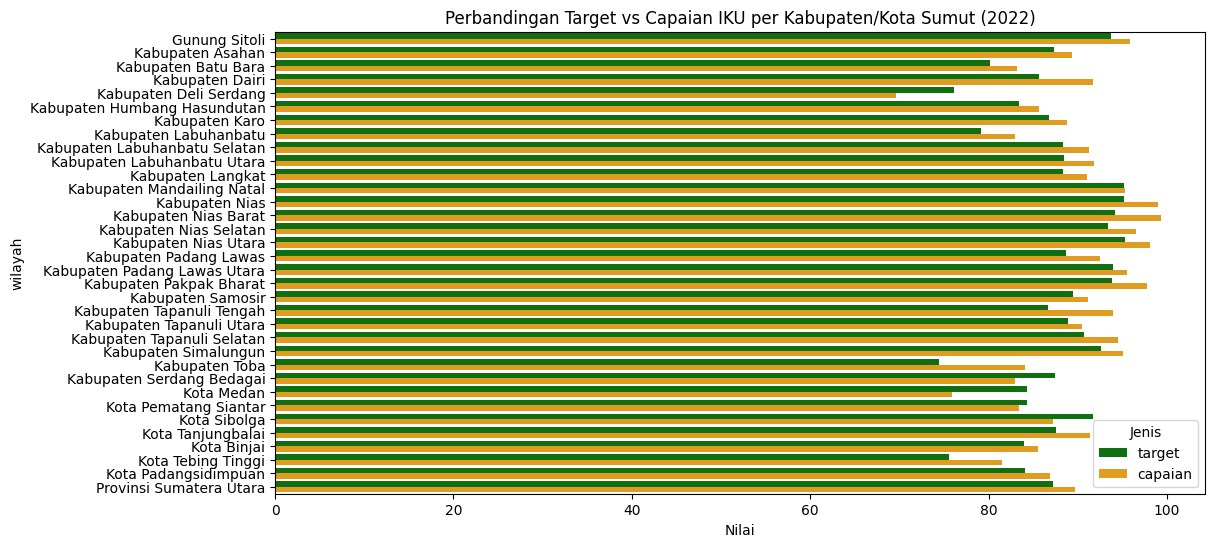

In [18]:
plt.figure(figsize=(12,6))

df_melt = index_udara.melt(
    id_vars="wilayah", 
    value_vars=["target","capaian"], 
    var_name="Jenis", 
    value_name="Nilai"
)

# definisikan palette di sini
palette = {"target": "green", "capaian": "orange"}

sns.barplot(
    data=df_melt, 
    x="Nilai", 
    y="wilayah", 
    hue="Jenis", 
    palette=palette
)

plt.title("Perbandingan Target vs Capaian IKU per Kabupaten/Kota Sumut (2022)")
plt.show()


# Ranking Berdasarkan Gap

In [19]:
# Tambahkan kolom gap
index_udara["gap"] = index_udara["capaian"] - index_udara["target"]

# Tambahkan kolom gap dalam persentase relatif terhadap target
index_udara["gap_pct"] = (index_udara["gap"] / index_udara["target"]) * 100

# Cek hasil
index_udara.head()


,wilayah,year,target,capaian,gap,gap_pct
0,Gunung Sitoli,2022,93.74,95.89,2.15,2.293578
1,Kabupaten Asahan,2022,87.33,89.40,2.07,2.370319
2,Kabupaten Batu Bara,2022,80.22,83.19,2.97,3.702319
3,Kabupaten Dairi,2022,85.69,91.74,6.05,7.060334
4,Kabupaten Deli Serdang,2022,76.14,69.68,-6.46,-8.484371


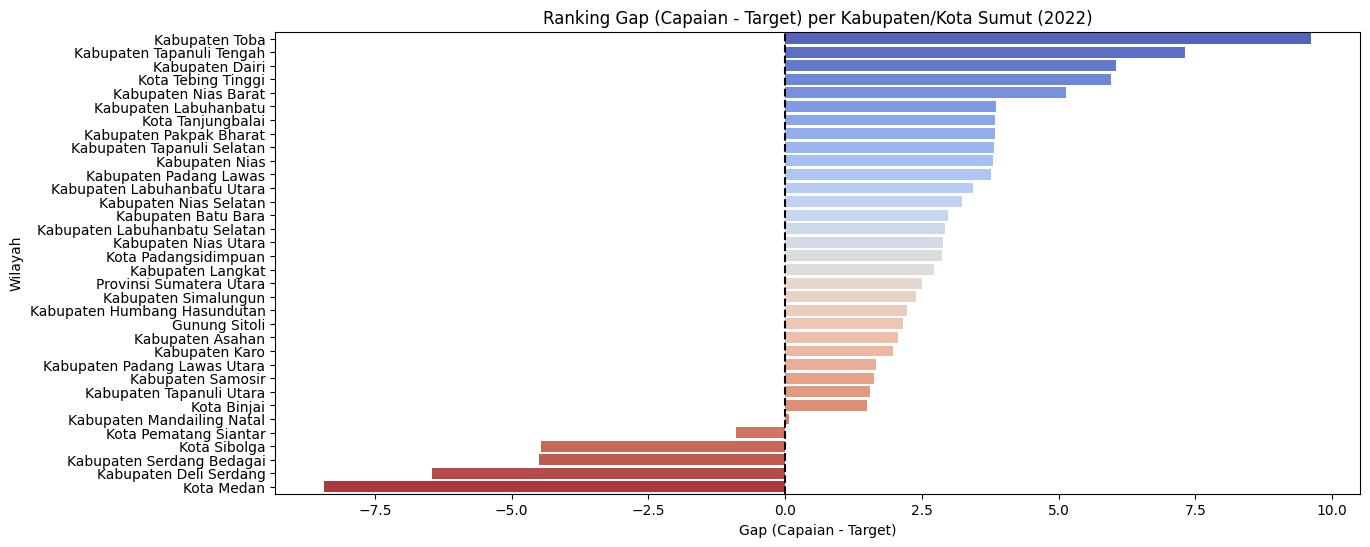

In [20]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=index_udara.sort_values("gap", ascending=False),
    x="gap", y="wilayah", palette="coolwarm"
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Ranking Gap (Capaian - Target) per Kabupaten/Kota Sumut (2022)")
plt.xlabel("Gap (Capaian - Target)")
plt.ylabel("Wilayah")
plt.show()


# Ringkasan Agregat Provinsi

In [21]:
print("Rata-rata Target:", round(index_udara["target"].mean(),2))
print("Rata-rata Capaian:", round(index_udara["capaian"].mean(),2))
print("Persentase daerah yang mencapai target:", 
      round((index_udara["gap"] >= 0).mean()*100,2), "%")


Rata-rata Target: 87.54
Rata-rata Capaian: 89.69
Persentase daerah yang mencapai target: 85.29 %


# Pertanyaan dasar seputar EDA 

* Wilayah mana saja yang melampaui target, dan mana yang gagal?

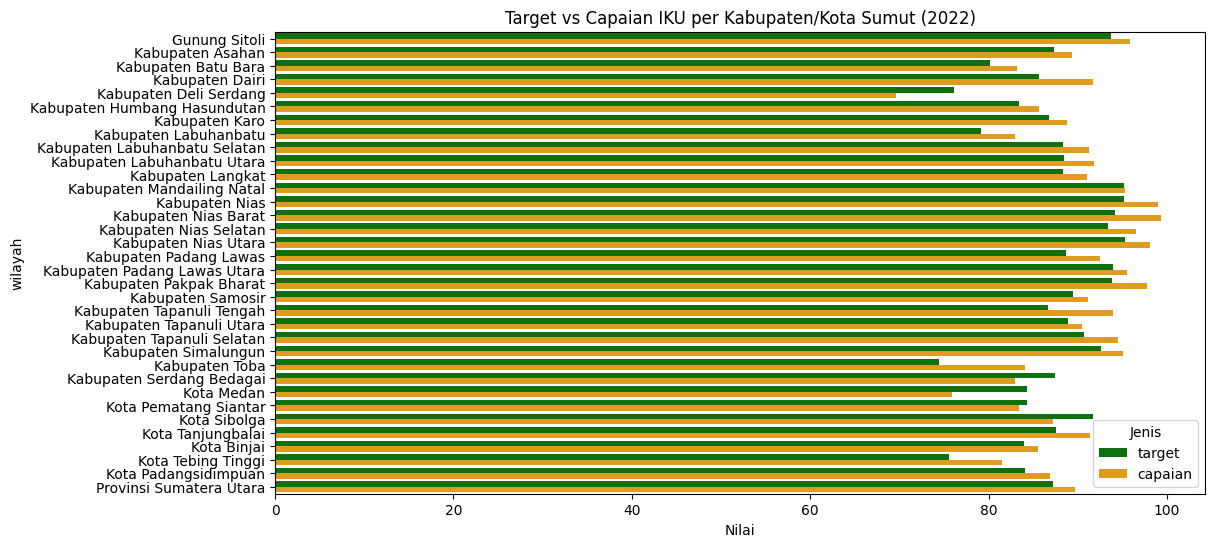

In [22]:
plt.figure(figsize=(12,6))
df_melt = index_udara.melt(id_vars="wilayah", 
                           value_vars=["target","capaian"], 
                           var_name="Jenis", value_name="Nilai")

sns.barplot(
    data=df_melt, 
    x="Nilai", 
    y="wilayah", 
    hue="Jenis", 
    palette=palette
)

plt.title("Target vs Capaian IKU per Kabupaten/Kota Sumut (2022)")
plt.show()



*  Siapa daerah terbaik & terburuk?

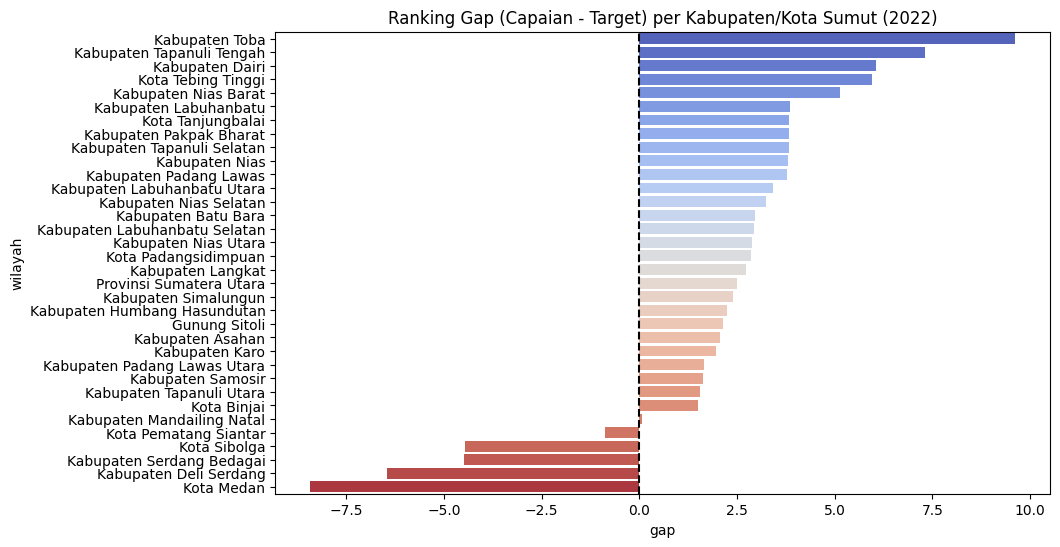

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=index_udara.sort_values("gap", ascending=False),
            x="gap", y="wilayah", palette="coolwarm")
plt.axvline(0, color="black", linestyle="--")
plt.title("Ranking Gap (Capaian - Target) per Kabupaten/Kota Sumut (2022)")
plt.show()


*  Bagaimana kinerja provinsi secara keseluruhan terhadap target nasional (0–100)?

In [24]:
avg_capai = index_udara["capaian"].mean()
if avg_capai >= 90: kategori = "Sangat Baik"
elif avg_capai >= 70: kategori = "Baik"
elif avg_capai >= 50: kategori = "Sedang"
elif avg_capai >= 25: kategori = "Kurang"
else: kategori = "Sangat Kurang"

print(f"📌 Rata-rata capaian provinsi: {avg_capai:.2f} ({kategori})")


📌 Rata-rata capaian provinsi: 89.69 (Baik)


# Summary & Conclusion


# 📌 Conclusion

## 1. Context
This analysis focuses on the 2022 Air Quality Index (IKU) of Regencies/Cities in North Sumatra.
The dataset covers over 20 regions, with the main variables being "target," "achievement," and the gap between the two.
The main objective is to determine the extent to which air quality achievement meets the established targets, both at the regency/city and provincial levels.

---

## 2. Insights
- North Sumatra Province as a whole → average target achieved, gap relatively small (approaching 0).
- Pattern of disparity between regions:
- Toba (+9.9), Central Tapanuli, and Dairi regencies show achievements **far above target** → can be considered among the best performers.
- Medan (-8.0), Deli Serdang, and Serdang Bedagai are actually **far below the target** → significantly underperforming.
- **Large urban areas** tend to underperform, likely related to urbanization, transportation pollution, and industrialization.
- **Most other areas** → are around the target (gap ±2), relatively stable.

---

## 3. Recommendations
1. **Comparing Top Performance**
- Identify success factors for Toba, Central Tapanuli, and Dairi Regencies.
- Apply similar practices to other regions, especially urban areas.

2. **Priority Interventions**
- Focus on **Medan, Deli Serdang, and surrounding areas**.
- Evaluate policies related to transportation, industrial emissions, and urban environmental management.

3. **Provincial Strategy**
- Although the average target has been achieved, the provincial government needs to reduce **disparities between regions**.
- Continuous annual monitoring and an interactive dashboard are required to detect trends early.

---

//

# 📌 Conclusion

## 1. Context
Analisis ini berfokus pada **Indeks Kualitas Udara (IKU) Kabupaten/Kota di Sumatera Utara Tahun 2022**.  
Dataset mencakup **20+ wilayah**, dengan variabel utama berupa `target`, `capaian`, serta selisih keduanya (`gap`).  
Tujuan utama adalah mengevaluasi sejauh mana capaian kualitas udara berhasil memenuhi target yang ditetapkan, baik di level kabupaten/kota maupun provinsi.

---

## 2. Insight
- **Provinsi Sumatera Utara secara total** → rata-rata target tercapai, gap relatif kecil (mendekati 0).  
- **Pola disparitas antar wilayah**:
  - Kabupaten **Toba (+9,9)**, Tapanuli Tengah, dan Dairi menunjukkan capaian **jauh di atas target** → bisa dianggap best performer.
  - Kota **Medan (-8,0)**, Deli Serdang, dan Serdang Bedagai justru **jauh di bawah target** → menjadi underperformer signifikan.
- **Tren wilayah perkotaan besar** → cenderung underperform, kemungkinan terkait urbanisasi, polusi transportasi, dan industrialisasi.  
- **Sebagian besar daerah lainnya** → berada di sekitar target (gap ±2), relatif stabil.

---

## 3. Recommendations
1. **Benchmarking Best Performer**  
   - Identifikasi faktor keberhasilan Kabupaten Toba, Tapanuli Tengah, dan Dairi.  
   - Terapkan praktik serupa ke wilayah lain, khususnya perkotaan.

2. **Prioritas Intervensi**  
   - Fokus pada **Medan, Deli Serdang, dan sekitarnya**.  
   - Lakukan evaluasi kebijakan terkait transportasi, emisi industri, serta pengelolaan lingkungan perkotaan.

3. **Strategi Provinsi**  
   - Walaupun target rata-rata tercapai, pemerintah provinsi perlu mengurangi **disparitas antar wilayah**.  
   - Perlu monitoring berkelanjutan per tahun + dashboard interaktif untuk mendeteksi tren lebih dini.

---
